# Diabetes prediction

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,  learning_curve, validation_curve, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import StratifiedKFold

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.pipeline import Pipeline as IMBPipeline

from mlxtend.feature_selection import SequentialFeatureSelector as SFS


In [3]:
df=pd.read_csv('data/diabetes_prediction_dataset.csv')

## Visualizing data

In [4]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [5]:
class_0_df = df[df['diabetes'] == 0]
class_1_df = df[df['diabetes'] == 1]

We visualize the distribution of the features to get a better idea of the data that we are dealing with.

Here we have the distribution for the features with numerical values and we distinguish these values from those in class 0 (non-diabetic) and class 1 (diabetic)

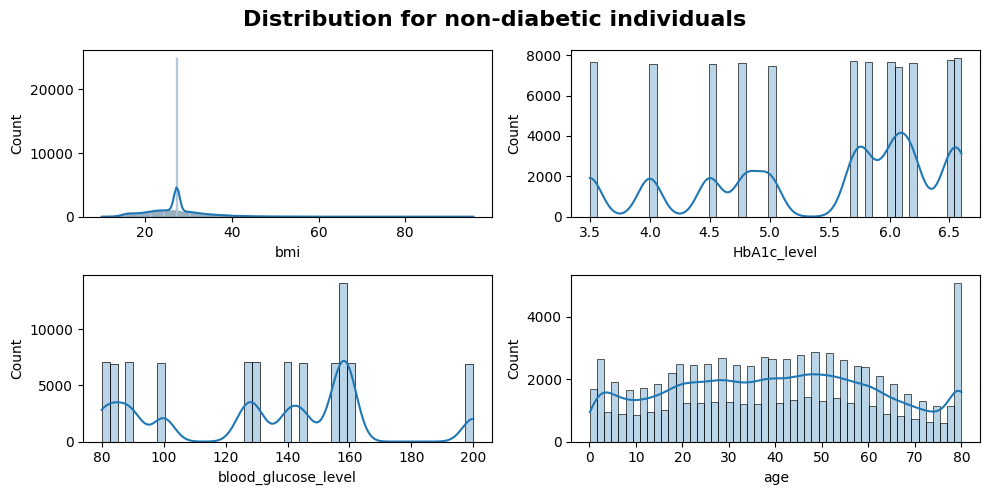

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

sns.histplot(data=class_0_df['bmi'], kde=True, alpha=0.3, ax=axes[0, 0])
sns.histplot(data=class_0_df['HbA1c_level'], kde=True, alpha=0.3, ax=axes[0, 1])
sns.histplot(data=class_0_df['blood_glucose_level'], kde=True, alpha=0.3, ax=axes[1, 0])
sns.histplot(data=class_0_df['age'], kde=True, alpha=0.3, ax=axes[1, 1])

plt.suptitle('Distribution for non-diabetic individuals', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

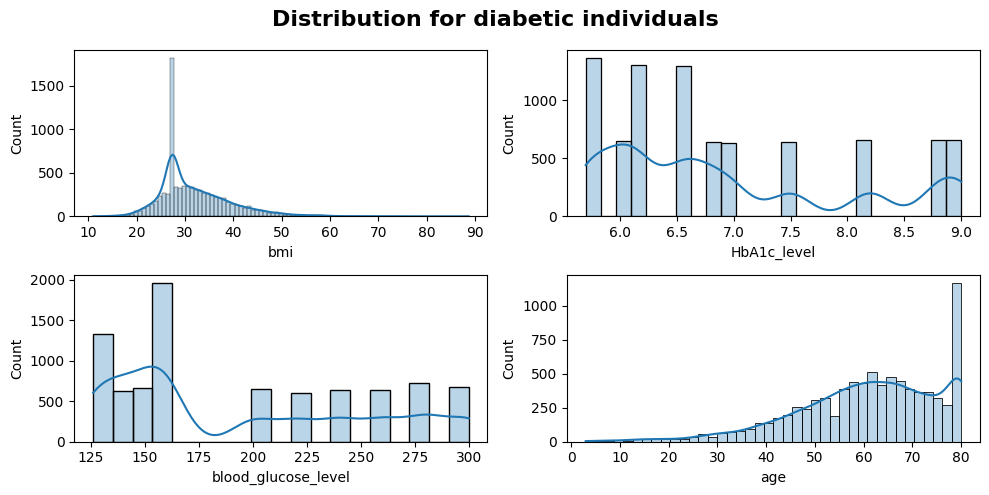

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

sns.histplot(data=class_1_df['bmi'], kde=True, alpha=0.3, ax=axes[0, 0])
sns.histplot(data=class_1_df['HbA1c_level'], kde=True, alpha=0.3, ax=axes[0, 1])
sns.histplot(data=class_1_df['blood_glucose_level'], kde=True, alpha=0.3, ax=axes[1, 0])
sns.histplot(data=class_1_df['age'], kde=True, alpha=0.3, ax=axes[1, 1])

plt.suptitle('Distribution for diabetic individuals', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Now we take a look at the other distributions, just as before we divide the data with label 0 and label 1

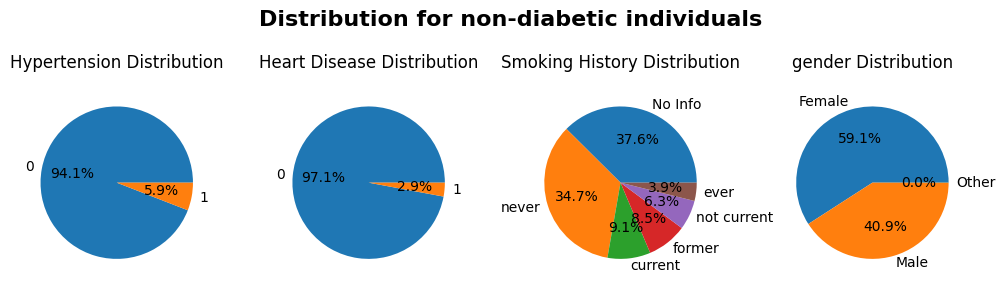

In [8]:
hypertension_0 = class_0_df['hypertension'].value_counts()
heart_disease_0 = class_0_df['heart_disease'].value_counts()
smoking_history_0 = class_0_df['smoking_history'].value_counts()
gender_0 = class_0_df['gender'].value_counts()

fig, axes = plt.subplots(1, 4, figsize=(10, 3))

axes[0].pie(hypertension_0, labels=hypertension_0.index, autopct='%1.1f%%')
axes[0].set_title('Hypertension Distribution')
axes[0].axis('equal')

axes[1].pie(heart_disease_0, labels=heart_disease_0.index, autopct='%1.1f%%')
axes[1].set_title('Heart Disease Distribution')
axes[1].axis('equal')

axes[2].pie(smoking_history_0, labels=smoking_history_0.index, autopct='%1.1f%%')
axes[2].set_title('Smoking History Distribution')
axes[2].axis('equal')

axes[3].pie(gender_0, labels=gender_0.index, autopct='%1.1f%%')
axes[3].set_title('gender Distribution')
axes[3].axis('equal')

plt.suptitle('Distribution for non-diabetic individuals', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

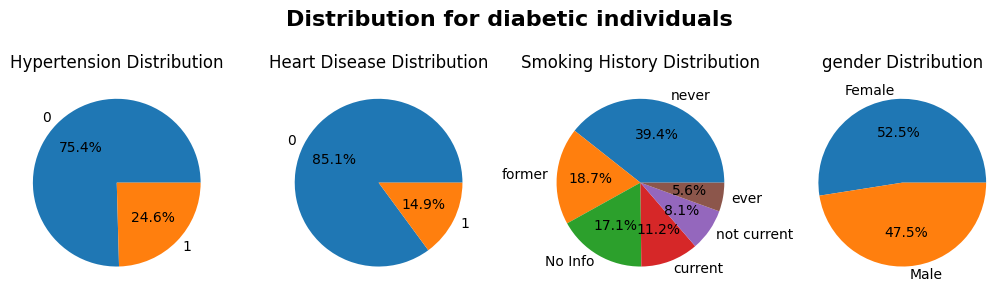

In [9]:
hypertension_1 = class_1_df['hypertension'].value_counts()
heart_disease_1 = class_1_df['heart_disease'].value_counts()
smoking_history_1 = class_1_df['smoking_history'].value_counts()
gender_1 = class_1_df['gender'].value_counts()

fig, axes = plt.subplots(1, 4, figsize=(10, 3))

axes[0].pie(hypertension_1, labels=hypertension_1.index, autopct='%1.1f%%')
axes[0].set_title('Hypertension Distribution')
axes[0].axis('equal')

axes[1].pie(heart_disease_1, labels=heart_disease_1.index, autopct='%1.1f%%')
axes[1].set_title('Heart Disease Distribution')
axes[1].axis('equal')

axes[2].pie(smoking_history_1, labels=smoking_history_1.index, autopct='%1.1f%%')
axes[2].set_title('Smoking History Distribution')
axes[2].axis('equal')

axes[3].pie(gender_1, labels=gender_1.index, autopct='%1.1f%%')
axes[3].set_title('gender Distribution')
axes[3].axis('equal')

plt.suptitle('Distribution for diabetic individuals', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Ultimately we inspect the distribution of the target column.

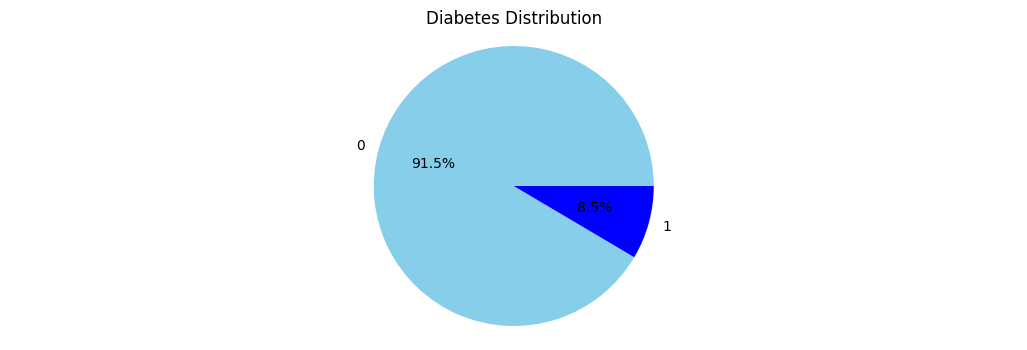

In [10]:
diabetes_counts = df['diabetes'].value_counts()

plt.figure(figsize=(13, 4))
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', colors=['skyblue', 'blue'])
plt.title('Diabetes Distribution')
plt.axis('equal') 

plt.show()

In [11]:
df.shape

(100000, 9)

In [12]:
df.isnull().sum(axis=0)

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

## Data Transformation

We check for duplicates

In [13]:
df.duplicated().sum()

3854

In [14]:
df=df.drop_duplicates()

In [15]:
df.shape

(96146, 9)

In [16]:
print(df.isnull().sum(axis=0))

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


From the feature distribution i noticed that for the feature 'gender' there weren't many rows with value 'Other', since it might create noise or ambiguity i decided to delete those rows.

In [17]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [18]:
(df['gender']=='Other').sum()

18

In [19]:
df.drop(df[df["gender"]=="Other"].index,inplace=True)
df.reset_index(drop=True,inplace=True)

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
(df['gender']=='Other').sum()

0

In [21]:
df.shape

(96128, 9)

Since the feature "smoking_history" has some rows with value "No Info" i decided to treat those as null values.

In [22]:
df['smoking_history'] = df['smoking_history'].replace('No Info', np.nan)

/tmp/ipykernel_172/1952638027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_history'] = df['smoking_history'].replace('No Info', np.nan)


Now, we deal with the missing values, categorical data and we implement scaling though column transformation.

In [23]:
 sh_pip=Pipeline(
    [
    ('si', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(categories='auto')),
    ]
)

In [24]:
transformation=ColumnTransformer(transformers=[
        ('sh_pip', sh_pip, ['smoking_history']),
        ('ohe', OneHotEncoder(categories='auto'),['gender']),
        ('min_max', MinMaxScaler(),['age'] ),
        ('std', StandardScaler(),['bmi','HbA1c_level', 'blood_glucose_level'] ),
        
    ],
    verbose_feature_names_out=False,
    remainder='passthrough',
)

In [25]:
transformed_data = transformation.fit_transform(df)
new_df = pd.DataFrame(transformed_data, columns=transformation.get_feature_names_out())
new_df

,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Female,gender_Male,age,bmi,HbA1c_level,blood_glucose_level,hypertension,heart_disease,diabetes
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.000000,-0.314941,0.994547,0.043558,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.674675,-0.000214,0.994547,-1.423041,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.349349,-0.000214,0.155949,0.483538,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.449449,-0.572042,-0.496294,0.410208,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.949950,-1.061124,-0.682649,0.410208,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96123,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.449449,-0.402119,-0.682649,0.165775,0.0,0.0,0.0
96124,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.024024,-1.470417,0.901370,-0.934175,0.0,0.0,0.0
96125,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.824825,0.075143,0.155949,0.410208,0.0,0.0,0.0
96126,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.299299,1.196634,-1.428070,-0.934175,0.0,0.0,0.0


In [26]:
new_df.isnull().sum(axis=0)

smoking_history_current        0
smoking_history_ever           0
smoking_history_former         0
smoking_history_never          0
smoking_history_not current    0
gender_Female                  0
gender_Male                    0
age                            0
bmi                            0
HbA1c_level                    0
blood_glucose_level            0
hypertension                   0
heart_disease                  0
diabetes                       0
dtype: int64

Now that we finished cleaning the data let's go to the model selection section.

## Model selection

We perform train, test spilt.

In [27]:
X = new_df.drop(['diabetes'], axis=1)
Y = new_df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y,  random_state=30, shuffle=True)

Here i define different list and create different combinations of classification models and compare their f1 sores

In [28]:
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
]


samplers = [
    ('None', None),
    ('SMOTE', SMOTE(sampling_strategy='auto', random_state=42)),
    ('RandomOverSampler', RandomOverSampler(sampling_strategy='auto', random_state=42)),
]


reductions = [
    ('None', None),
    ('PCA', PCA(random_state=42)),
    ('LDA', LDA()),
]

In [29]:
results = []

for model_name, model in models:
    for sampler_name, sampler in samplers:
        for reduction_name, reduction in reductions:
            if sampler_name == 'None':
                sampler = None 

            pipeline = IMBPipeline([
                ('sampler', sampler),
                ('reduction', reduction),
                ('model', model)
            ])

            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)
            f1 = f1_score(y_test, y_pred)

            result_info = {
                'Model': model_name,
                'Sampler': sampler_name,
                'Reduction': reduction_name,
                'F1 Score': f1
            }

            results.append(result_info)

# Sort the results based on F1 score in ascending order
sorted_results = sorted(results, key=lambda x: x['F1 Score'])

# Print the sorted results
for result_info in sorted_results:
    print(f"Model: {result_info['Model']}, Sampler: {result_info['Sampler']}, Reduction: {result_info['Reduction']}, F1 Score: {result_info['F1 Score']}")

Model: Random Forest, Sampler: SMOTE, Reduction: LDA, F1 Score: 0.48737575688335427
Model: Decision Tree, Sampler: SMOTE, Reduction: LDA, F1 Score: 0.4878216123499143
Model: KNN, Sampler: SMOTE, Reduction: LDA, F1 Score: 0.5385539274561614
Model: Logistic Regression, Sampler: SMOTE, Reduction: None, F1 Score: 0.5763059940957515
Model: Logistic Regression, Sampler: SMOTE, Reduction: PCA, F1 Score: 0.5763059940957515
Model: Logistic Regression, Sampler: RandomOverSampler, Reduction: None, F1 Score: 0.5768145678379072
Model: Logistic Regression, Sampler: RandomOverSampler, Reduction: PCA, F1 Score: 0.576888546877004
Model: KNN, Sampler: RandomOverSampler, Reduction: LDA, F1 Score: 0.5784054133568698
Model: Logistic Regression, Sampler: RandomOverSampler, Reduction: LDA, F1 Score: 0.5802073998207656
Model: Logistic Regression, Sampler: SMOTE, Reduction: LDA, F1 Score: 0.5803971812940423
Model: Decision Tree, Sampler: None, Reduction: LDA, F1 Score: 0.6069534472598703
Model: Random Forest, 

### Random Forest Classifier

The best result is:  Model: Random Forest, Sampler: None, Reduction: None, F1 Score:  0.7897015265436318

In [30]:
best_model=Pipeline([
    ('model', RandomForestClassifier()),
])

In [31]:
best_model.fit(X_train, y_train)

Pipeline(steps=[('model', RandomForestClassifier())])

In [34]:
y_pred = best_model.predict(X_test)
print(f"accuracy:{accuracy_score(y_test, y_pred)} f1:{f1_score(y_test, y_pred)}, recall:{recall_score(y_test, y_pred)}, precision:{precision_score(y_test, y_pred)}")

accuracy:0.9681334304240785 f1:0.7905174378846592, recall:0.681335952848723, precision:0.9413680781758957


In [35]:
train_sizes, train_scores, test_scores = learning_curve(estimator=best_model,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = StratifiedKFold(n_splits=5),
                                                       n_jobs = -1,
                                                       scoring = 'f1',
                                                       shuffle = False)

In [36]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

(0.5, 1.1)

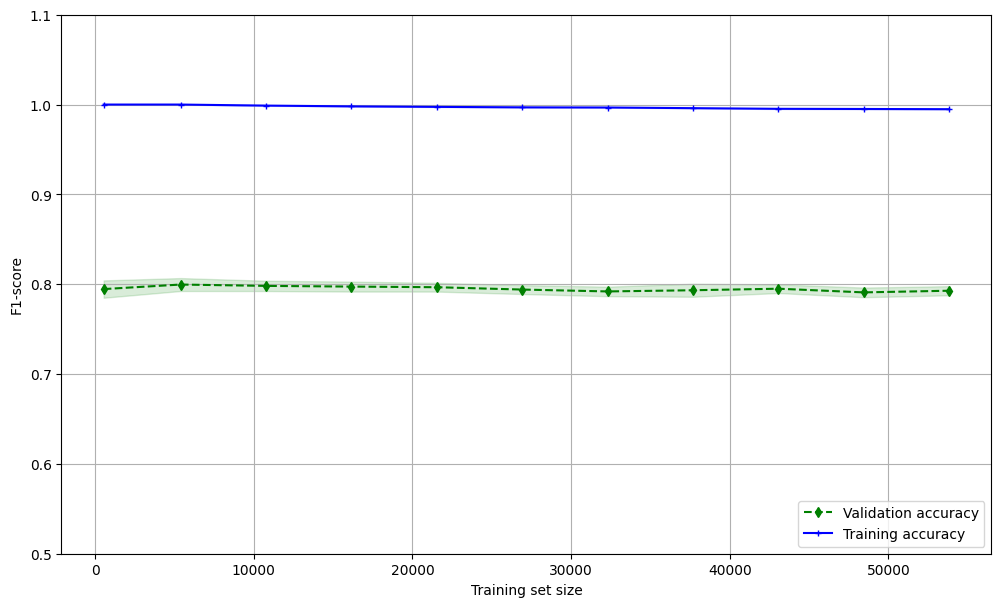

In [37]:
fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation accuracy')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training accuracy')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.set_xlabel('Training set size')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')

ax.grid()
ax.set_ylim([0.50, 1.10])

The f1 score for training and validation are both high but the validation f1 score is lower than the training one, suggesting that there might be an overfit of the training data and that the model doesn't work as well on unseen data. 

Let's try with the second best model to see if we can get a better result:  Model: Random Forest, Sampler: RandomOverSampler, Reduction: None, F1 Score:  0.7738927738927739

In [38]:
model2=IMBPipeline([
    ('sampler', RandomOverSampler(sampling_strategy='auto', random_state=42)),
    ('model', RandomForestClassifier())
])

In [39]:
model2.fit(X_train, y_train)

Pipeline(steps=[('sampler', RandomOverSampler(random_state=42)),
                ('model', RandomForestClassifier())])

In [40]:
y_pred = model2.predict(X_test)
print(f"accuracy:{accuracy_score(y_test, y_pred)} f1:{f1_score(y_test, y_pred)}, recall:{recall_score(y_test, y_pred)}, precision:{precision_score(y_test, y_pred)}")

accuracy:0.9630014910364437 f1:0.7738927738927739, recall:0.7174852652259333, precision:0.8399264029438822


In [41]:
train_sizes, train_scores, test_scores = learning_curve(estimator=model2,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = StratifiedKFold(n_splits=5),
                                                       n_jobs = -1,
                                                       scoring = 'f1',
                                                       shuffle = False)

In [42]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

(0.5, 1.1)

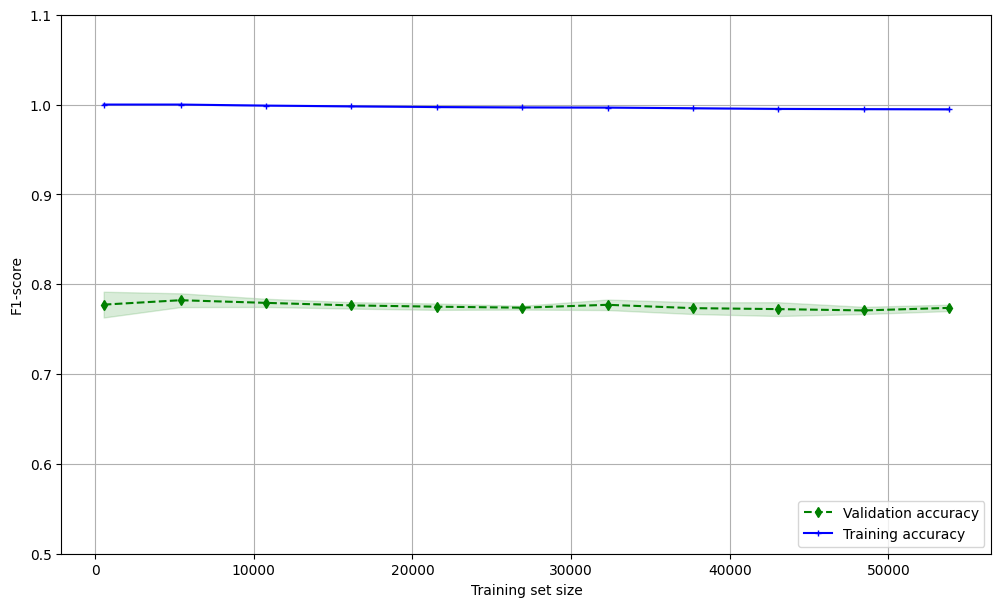

In [43]:
fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation accuracy')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training accuracy')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.set_xlabel('Training set size')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')

ax.grid()
ax.set_ylim([0.50, 1.10])

We got a similiar result as before with a lower f1 score for the validation curve. Let's take a look at other models' performanes before tuning hyperparameters 

### K-Neighbors Classifier

Since random forest seems to be overfitting we are now going to try the best combination for knn (Model: KNN, Sampler: None, Reduction: PCA, F1 Score:0.739413680781759) which was the best performing classifier after Random forest.

In [44]:
model3=Pipeline([
    ('reduction', PCA()),
    ('model', KNeighborsClassifier())
])

In [45]:
model3.fit(X_train, y_train)

Pipeline(steps=[('reduction', PCA()), ('model', KNeighborsClassifier())])

In [46]:
y_pred = model3.predict(X_test)
print(f"accuracy:{accuracy_score(y_test, y_pred)} f1:{f1_score(y_test, y_pred)}, recall:{recall_score(y_test, y_pred)}, precision:{precision_score(y_test, y_pred)}")

accuracy:0.9611637019314123 f1:0.739413680781759, recall:0.6243614931237721, precision:0.9064460924130062


In [47]:
train_sizes, train_scores, test_scores = learning_curve(estimator=model3,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = StratifiedKFold(n_splits=5),
                                                       n_jobs = -1,
                                                       scoring = 'f1',
                                                       shuffle = False)

In [48]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

(0.4, 0.9)

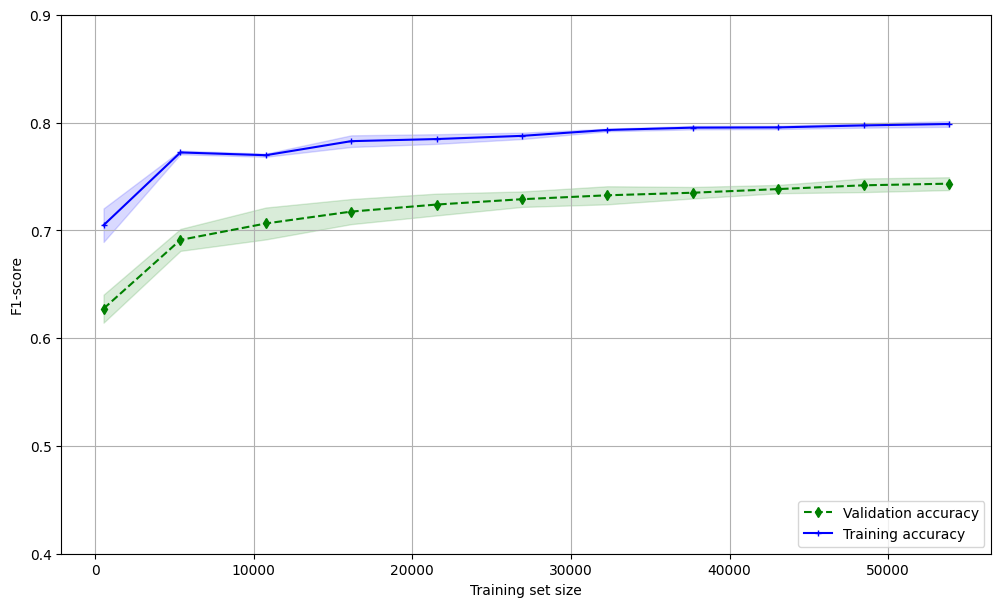

In [49]:
fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation accuracy')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training accuracy')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.set_xlabel('Training set size')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')

ax.grid()
ax.set_ylim([0.40, 0.9])

There seems to be less overfitting for this combination but we will try to get a better result

### Logistic Regression

The pipeline:  Model-> Logistic Regression, Sampler-> None, Reduction-> PCA and  Logistic Regression, Sampler-> None, Reduction-> None have the same f1 score (0.7290483761071997) which are the best results for logistic regression so I am going to try the pipeline with PCA reduction and add 9 (total number of features) to the possible  n_components of PCA for hyperparameter tuning to compare the performances. 

In [50]:
model4=Pipeline([
    ('reduction', PCA()),
    ('model', LogisticRegression())
])

In [51]:
model4.fit(X_train, y_train)

Pipeline(steps=[('reduction', PCA()), ('model', LogisticRegression())])

In [ ]:
y_pred=model4.predict(X_test)

In [52]:
train_sizes, train_scores, test_scores = learning_curve(estimator=model4,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = StratifiedKFold(n_splits=5),
                                                       n_jobs = -1,
                                                       scoring = 'f1',
                                                       shuffle = False)

In [53]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

(0.4, 0.9)

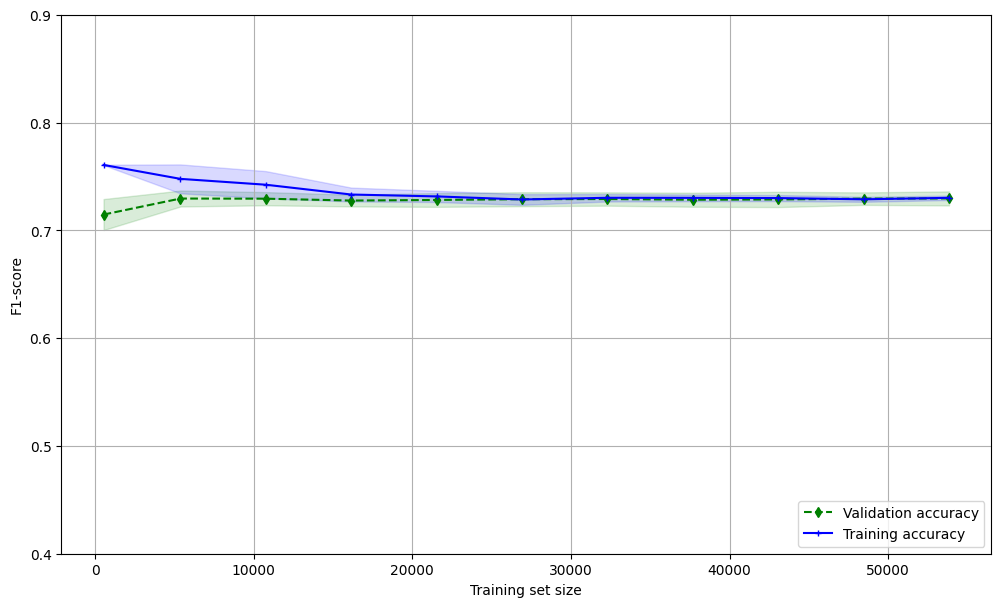

In [54]:
fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation accuracy')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training accuracy')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.set_xlabel('Training set size')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')

ax.grid()
ax.set_ylim([0.40, 0.9])

Training and validation curve are closer to each other if we compare them to the previous models.

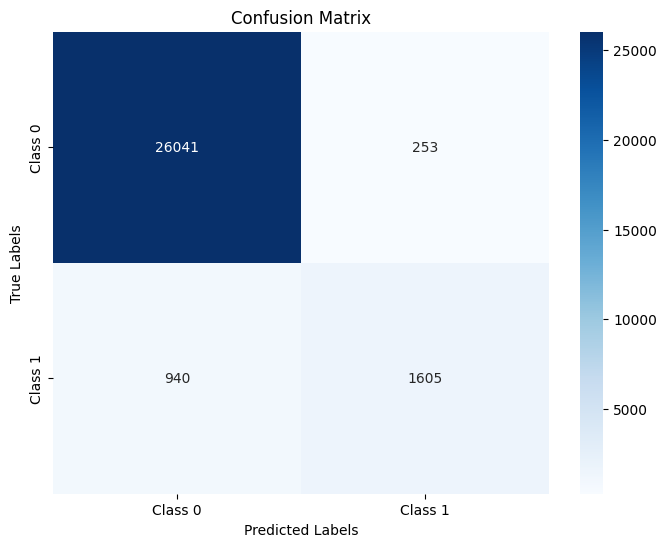

In [55]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [56]:
print(f"accuracy:{accuracy_score(y_test, y_pred)} f1:{f1_score(y_test, y_pred)}, recall:{recall_score(y_test, y_pred)}, precision:{precision_score(y_test, y_pred)}")

accuracy:0.9586324075037276 f1:0.7290483761071997, recall:0.630648330058939, precision:0.8638320775026911


Now we try some hyperparameter tuning to see if we can improve the accuracy

In [57]:
param_grid = {
    'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logistic__penalty': ['l1', 'l2'],
    'logistic__solver': ['liblinear'],
    'logistic__max_iter': [100, 500, 1000],
    'pca__n_components': [2, 4, 6, 7, 9]}

pipeline = Pipeline([
    ('pca', PCA()),
    ('logistic', LogisticRegression())
])

In [58]:
rs = RandomizedSearchCV(
    pipeline,
    param_grid,
    cv=StratifiedKFold(n_splits=8, shuffle=True, random_state=30),
    scoring='f1',
    random_state=30
)
rs.fit(X_train, y_train)

best_params = rs.best_params_
best_estimator = rs.best_estimator_

y_pred = best_estimator.predict(X_test)
f1_score_best = f1_score(y_test, y_pred)

print(f'Best Parameters: {best_params}')
print(f'F1-Score with Best Parameters: {f1_score_best}')

Best Parameters: {'pca__n_components': 9, 'logistic__solver': 'liblinear', 'logistic__penalty': 'l2', 'logistic__max_iter': 1000, 'logistic__C': 100}
F1-Score with Best Parameters: 0.7293796864349011


In terms of f1 score the model with hyperparameter tuning is performing slightly better.

In [59]:
rs.best_estimator_.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=9)),
                ('logistic',
                 LogisticRegression(C=100, max_iter=1000, solver='liblinear'))])

In [60]:
y_pred_2=best_estimator.predict(X_test)

In [61]:
train_sizes, train_scores, test_scores = learning_curve(estimator=rs.best_estimator_,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = StratifiedKFold(n_splits=5),
                                                       n_jobs = -1,
                                                       scoring = 'f1',
                                                       shuffle = False)

In [62]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

(0.4, 0.9)

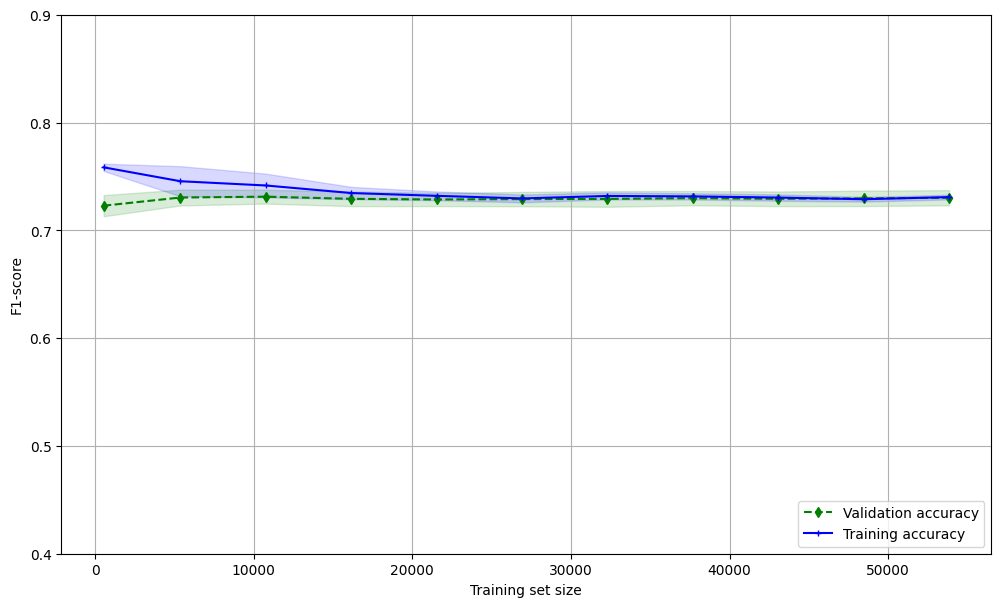

In [63]:
fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation accuracy')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training accuracy')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.set_xlabel('Training set size')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')

ax.grid()
ax.set_ylim([0.40, 0.9])

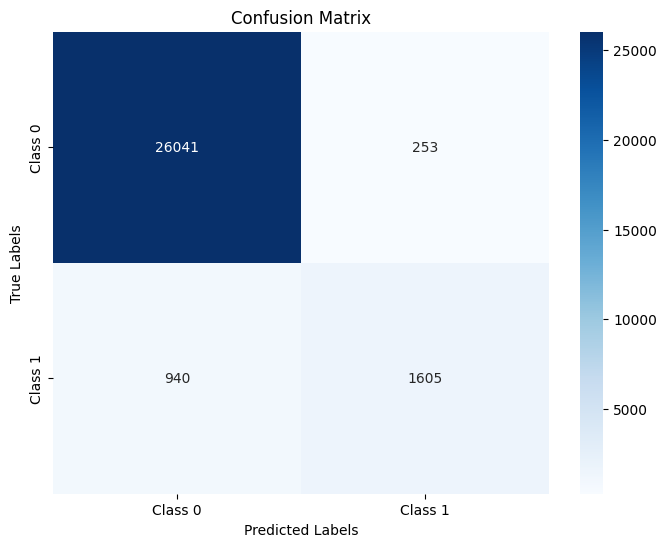

In [64]:
cm = confusion_matrix(y_test, y_pred_2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [66]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     26294
         1.0       0.86      0.63      0.73      2545

    accuracy                           0.96     28839
   macro avg       0.91      0.81      0.85     28839
weighted avg       0.96      0.96      0.96     28839



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=df00cfbb-df62-4584-a655-05b274c41646' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>